# Importacion de librerias 
para la correcta realizacion de nuestro analisis es necesario que importemos varias librerias que nos permitan realizar funciones diferentes con nuestros datos

In [13]:

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import talib as tb

# Bloqueo de las criptomonedas en china
el 24 de septiembre de 2021 china declaro ilegal las transacciones y uso de criptomonedas en todo el pais. veremos luego de este suceso si tuvo alguna repercucion en el precio de la criptomoneda

##  comportamiento antes de la fecha de bloqueo

In [3]:
btc = yf.download('BTC-USD','2021-09-01','2021-09-22')

[*********************100%***********************]  1 of 1 completed


In [4]:
btc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01
mean,47235.787642,48332.603338,45784.534624,47086.710582,47086.710582,3.817506e+10
std,2708.298376,2475.648254,2834.444491,2822.930505,2822.930505,8.779173e+09
min,40677.953125,43607.609375,39787.609375,40693.675781,40693.675781,2.696772e+10
25%,45845.360352,47078.337891,44398.711914,45416.910156,45416.910156,3.080445e+10
50%,47180.589844,48244.644531,46116.087891,47176.355469,47176.355469,3.866240e+10
75%,48673.099609,50035.338867,47085.353516,48704.861328,48704.861328,4.060448e+10
max,52660.480469,52853.765625,51053.679688,52633.535156,52633.535156,6.521006e+10


In [5]:
#tipos de datos
btc.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
#nobre de las columnas
btc.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

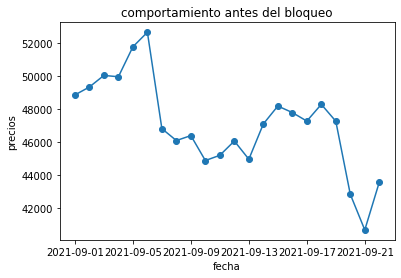

In [7]:
#grafica del precio
plt.plot(btc['Close'],marker ='o') 
plt.rcParams["figure.figsize"] = (20,5)
plt.title('comportamiento antes del bloqueo')
plt.xlabel('fecha')
plt.ylabel('precios')
plt.show()

<AxesSubplot:xlabel='Date'>

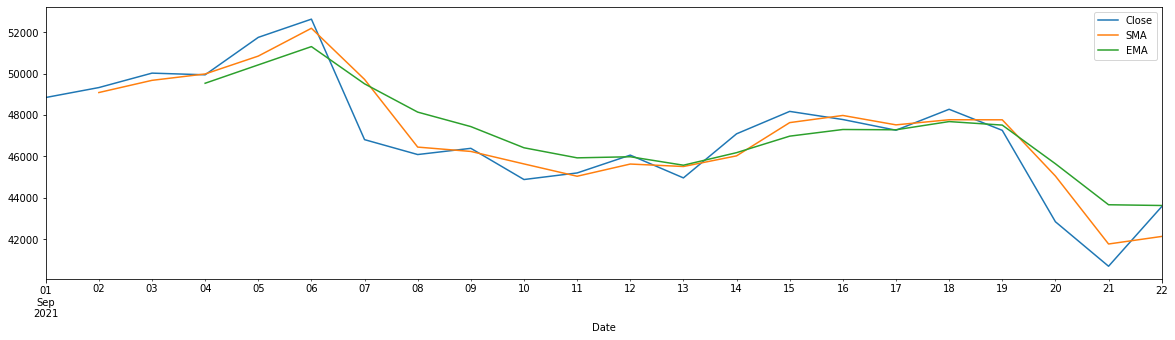

In [9]:

#EMA&SMA
btc['SMA'] = tb.SMA(btc.Close.values,2)
btc['EMA'] = tb.EMA(btc.Close.values,4)
btc[['Close','SMA','EMA']].plot()

<AxesSubplot:xlabel='Date'>

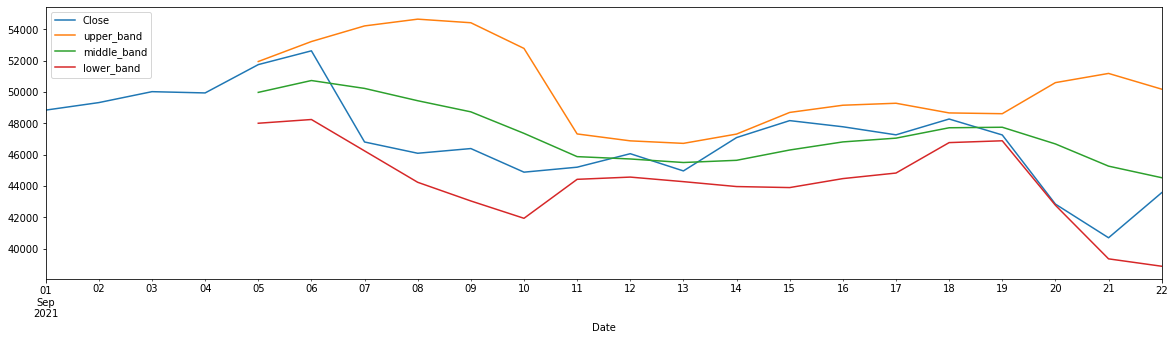

In [10]:
#bandas de bollinger
btc['upper_band'], btc['middle_band'],btc['lower_band'] = tb.BBANDS(btc['Close'])
btc[['Close','upper_band','middle_band','lower_band']].plot()

In [32]:
#precio de inicio del periodo
inicio = btc['Adj Close'].iloc[0]
print('precio de inicio del periodo :',inicio)

precio de inicio del periodo : 48847.02734375


In [33]:
#precio mas bajo del periodo
precioMinimo =min(btc['Adj Close'])
print('precio mas bajod del periodo :',precioMinimo)

precio mas bajod del periodo : 40693.67578125


In [34]:
#precio mas alto del periodo
precioMaximo =max(btc['Adj Close'])
print('precio mas alto del periodo: ',precioMaximo)

precio mas alto del periodo:  52633.53515625


In [35]:
#precio de cierre del periodo
fin = btc['Adj Close'].iloc[-1]
print('precio de cierre del periodo : ',fin)

precio de cierre del periodo :  43574.5078125


## COMPORTAMIENTO DESPUES DEL BLOQUEO

In [14]:
#descarga de datos
bloq =yf.download('BTC-USD','2021-09-23','2021-09-30')

[*********************100%***********************]  1 of 1 completed


In [15]:
#descripcion de los datos
bloq.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00
mean,42758.556641,43833.059570,41506.353516,42785.688965,42785.688965,3.278605e+10
std,1199.718171,968.759175,815.175367,1225.161522,1225.161522,4.250206e+09
min,41064.984375,42545.257812,40829.667969,41034.542969,41034.542969,3.021494e+10
25%,42038.491211,42940.979492,40910.863281,42067.888672,42067.888672,3.064651e+10
50%,42781.259766,44005.951172,41190.570312,42778.171875,42778.171875,3.106086e+10
75%,43315.711914,44470.478516,41867.599609,43354.127930,43354.127930,3.226455e+10
max,44894.300781,45080.492188,43109.339844,44895.097656,44895.097656,4.283935e+10


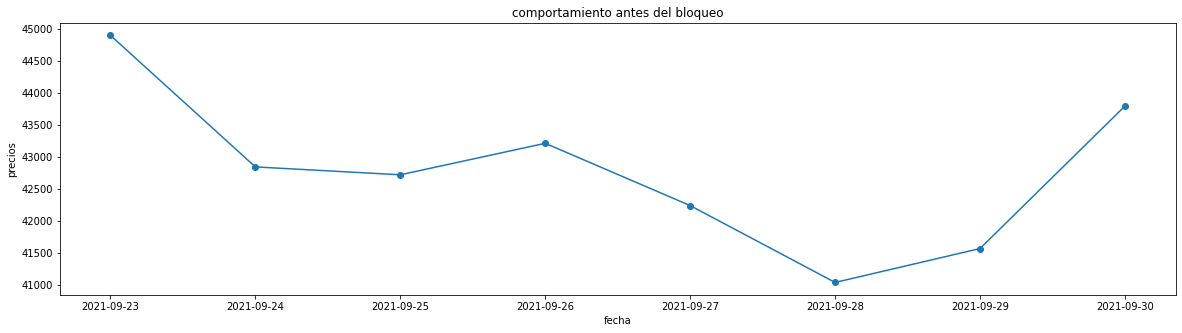

In [16]:
#grafica del precio
plt.plot(bloq['Close'],marker ='o') 
plt.rcParams["figure.figsize"] = (20,5)
plt.title('comportamiento antes del bloqueo')
plt.xlabel('fecha')
plt.ylabel('precios')
plt.show()

<AxesSubplot:xlabel='Date'>

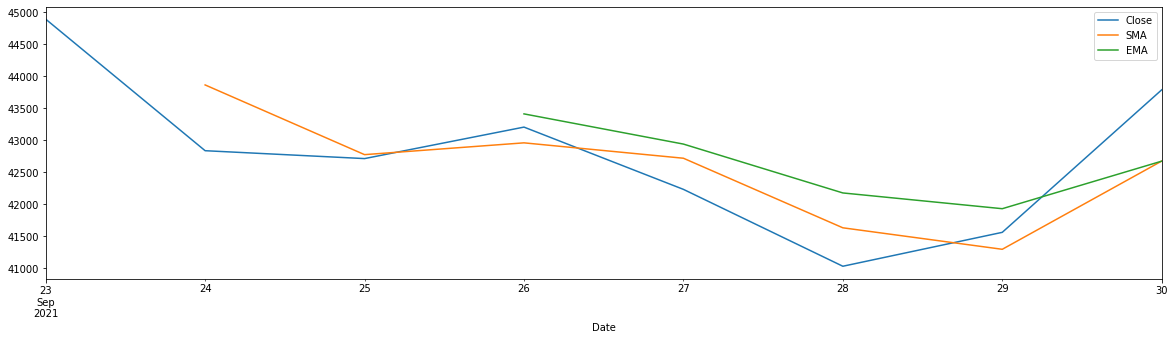

In [18]:
#EMA&SMA
bloq['SMA'] = tb.SMA(bloq.Close.values,2)
bloq['EMA'] = tb.EMA(bloq.Close.values,4)
bloq[['Close','SMA','EMA']].plot()

<AxesSubplot:xlabel='Date'>

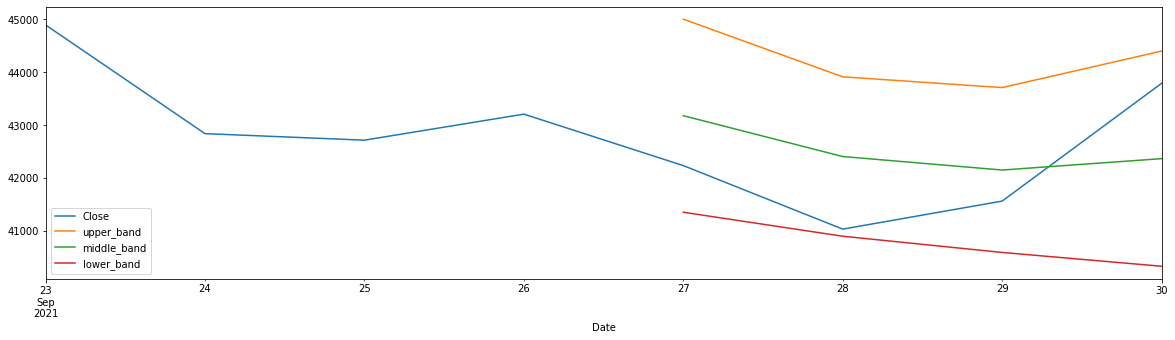

In [19]:
#bandas de bollinger
bloq['upper_band'], bloq['middle_band'],bloq['lower_band'] = tb.BBANDS(bloq['Close'])
bloq[['Close','upper_band','middle_band','lower_band']].plot()

In [20]:
#identificacion de columnas
bloq.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA', 'EMA',
       'upper_band', 'middle_band', 'lower_band'],
      dtype='object')

In [28]:
bloq.loc[:,['Open','High','Low','Adj Close']]

,Open,High,Low,Adj Close
Date,,,,
2021-09-23,43560.296875,44942.175781,43109.339844,44895.097656
2021-09-24,44894.300781,45080.492188,40936.558594,42839.750000
2021-09-25,42840.890625,42996.257812,41759.921875,42716.593750
2021-09-26,42721.628906,43919.300781,40848.460938,43208.539062
2021-09-27,43234.183594,44313.246094,42190.632812,42235.730469
2021-09-28,42200.898438,42775.144531,40931.664062,41034.542969
2021-09-29,41064.984375,42545.257812,40829.667969,41564.363281
2021-09-30,41551.269531,44092.601562,41444.582031,43790.894531


In [21]:
#precio de inicio de periodo
bloq['Adj Close'].iloc[0]

44895.09765625

In [22]:
#precio minimo de periodo
precioMinimo =min(bloq['Adj Close'])
print('precio mas bajo :',precioMinimo)

precio mas bajo : 41034.54296875


# HALVING
cada 4 años el bitcoin aumenta su dificultad de minado y ademas de eso reduce las recompensas a los mineros que aportan seguridad a las transacciones mediante bitcoin.veremos como el halving afecta el precio del bitcoin

In [3]:
#lectura del archivo csv con los datos
halv = pd.read_csv('dificultad.csv')

In [4]:
#descripcion de los valores en el dataframe
halv.describe()

,difficulty
count,3.650000e+02
mean,2.106005e+13
std,3.564778e+12
min,1.367259e+13
25%,1.899764e+13
50%,2.165934e+13
75%,2.358198e+13
max,2.796715e+13


In [5]:
#busqueda de la dificultad maxima
maxima = max(halv['difficulty'])
print('la dificultad maxima de minado fue :',maxima)

la dificultad maxima de minado fue : 27967152532434.0


In [8]:
#busqueda de las fechas del halving
ihalv = halv[halv.difficulty >= maxima]
len(ihalv)

3

In [9]:
#visualizacion de la busqueda
print(ihalv)

               Timestamp    difficulty
362  2022-02-18 00:00:00  2.796715e+13
363  2022-02-19 00:00:00  2.796715e+13
364  2022-02-20 00:00:00  2.796715e+13


In [10]:
#descarga del precio en periodo de halving
btcHalv = yf.download('BTC-USD','2022-02-18','2022-02-21')

[*********************100%***********************]  1 of 1 completed


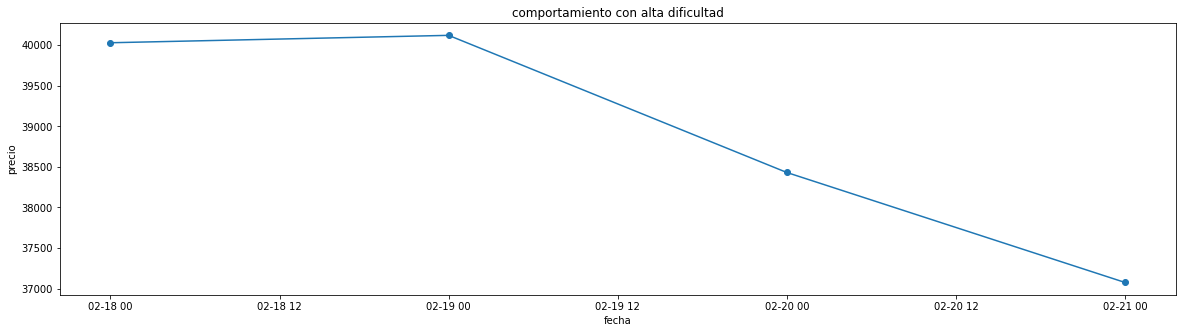

In [20]:
#graficacion del precio en el periodo de maxima dificultad encontrada
plt.plot(btcHalv['Adj Close'],marker='o')
plt.rcParams["figure.figsize"] = (20,5)
plt.title('comportamiento con alta dificultad')
plt.xlabel('fecha')
plt.ylabel('precio')
plt.show()

In [21]:
#precio mas bajo del periodo
precioMinimoHalv = min(btcHalv['Adj Close'])
print('el precio mas bajo del periodo fue :',precioMinimoHalv)

el precio mas bajo del periodo fue : 37075.28125


In [22]:
#busqueda del primer precio del periodo
inicioHalv = btcHalv['Adj Close'].iloc[0]
print('precio de inicio de periodo :',inicioHalv)

precio de inicio de periodo : 40030.9765625


In [23]:
#busqueda del ultimo precio del periodo
finalHalv = btcHalv['Adj Close'].iloc[-1]
print('precio de final de periodo :',finalHalv)

precio de final de periodo : 37075.28125
